<a href="https://colab.research.google.com/github/gustavo-ifusp/exercicios_programacao_usp/blob/main/Atividade_25_TEFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Definição de Funções

def mmq(g,y,sy):
    D = np.zeros((2,1))
    M = np.zeros((2,2))
    for i in range(len(M[:][0])):
        D[i] = np.sum(y*g[i]/sy**2)
        for j in range(len(M[0][:])):
            M[i][j] = np.sum(g[i]*g[j]/sy**2)
    A = np.matmul(np.linalg.inv(M),D) #Vetor coeficiente
    MCov = np.linalg.inv(M) #Matriz de Covariância 
    
    return A,MCov
def f(x,A):
    return A[0][0] + A[1][0]*x

# **Resolução de exercício**

a)
Sb: 0.05 cm/s
Sa: 0.28 cm
Coef. de Correlação: -0.845

b)
a = 20.08 +/- 0.28 cm
b = 2.97 +/- 0.05 cm/s
Chi² = 16.652202
NGL = 9


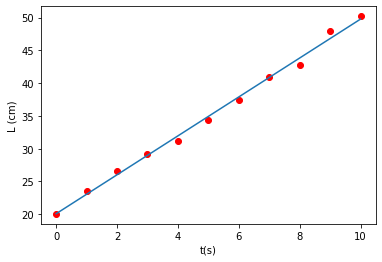

c)


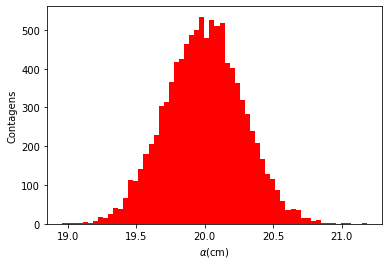

desv_pad a = 0.2813 +/- 0.0028


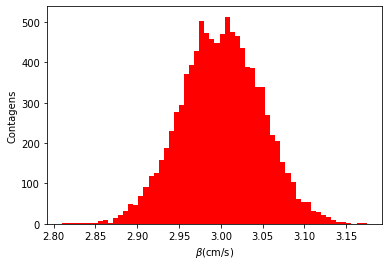

desv_pad b = 0.0479 +/- 0.0005


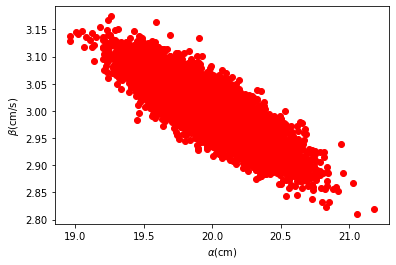

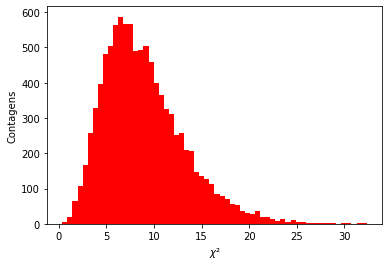

chi² médio = 8.942817 +/- 0.042476


In [ ]:
sLexp = np.zeros(11)
sLexp[:] = 0.5#cm

t = np.linspace(0,10,11) #s
L = np.zeros(len(t))
v0 = np.zeros(len(t))
#s(t) = s(0) + v(0)*t
g = [1,t]
M = np.zeros((2,2))
for i in range(len(M[:][0])):
    for j in range(len(M[0][:])):
        M[i][j] = np.sum(g[i]*[g[j]]/sLexp**2)
        
cov = np.linalg.inv(M)
sig_ang  = np.sqrt(cov[1][1])
sig_lin = np.sqrt(cov[0][0])
coef_corr = cov[1][0]/(sig_ang*sig_lin)
print('a)')
print('Sb: %.2f cm/s' %(sig_ang))
print('Sa: %.2f cm' %(sig_lin))
print('Coef. de Correlação: %.3f' %(coef_corr))

a0 = 20 #cm
b0 = 3 #cm/s

for i in range(len(t)):
    sL = 0.5*np.random.normal(0,1)
    L[i] = a0 + b0*t[i] + sL
    
A, cov= mmq(g,L,sLexp)
Q = ((L - f(t,A))/sLexp)**2 
chi2 = np.sum(Q)
NGL = len(t) - len(A)

print('\nb)')
print('a = %.2f +/- %.2f cm' %(A[0][0], sig_lin))
print('b = %.2f +/- %.2f cm/s' %(A[1][0], sig_ang))
print('Chi² = %f' %(chi2))
print('NGL = %d' %NGL)
plt.plot(t,L,'ro')
plt.plot(t,f(t,A))
plt.xlabel('t(s)')
plt.ylabel('L (cm)')
plt.show()

print('c)')
N = 10**4
a = np.zeros(N)
b = np.zeros(N)
chi2 = np.zeros(N)
for j in range(N):
    a0 = 20 #cm
    b0 = 3 #cm/s

    for i in range(len(t)): #sortealndo valores de L
        sL = 0.5*np.random.normal()
        L[i] = a0 + b0*t[i] + sL

    A, cov= mmq(g,L,sLexp)
    a[j] = A[0][0] # atualiza vetores dos a
    b[j] = A[1][0] # atualiza vetores dos b
    
    #Calcula chi² a cada rodada
    Q = ((L - f(t,A))/sLexp)**2 
    chi2[j] = np.sum(Q)

plt.hist(a,bins = 60, color ='red')
plt.xlabel(r'$\alpha$(cm)')
plt.ylabel('Contagens')
plt.savefig('a.png', dpi = 200)
plt.show()
sstda = np.std(a)/np.sqrt(N-1)
print('desv_pad a = %.4f +/- %.4f'%(np.std(a), sstda))

plt.hist(b,bins = 60, color = 'red')
plt.xlabel(r'$\beta$(cm/s)')
plt.ylabel('Contagens')
plt.savefig('b.png', dpi = 200)
plt.show()
sstdb = np.std(b)/np.sqrt(N-1)
print('desv_pad b = %.4f +/- %.4f' %(np.std(b),sstdb))

plt.plot(a,b,'ro')
plt.xlabel(r'$\alpha$(cm)')
plt.ylabel(r'$\beta$(cm/s)')
plt.savefig('correlacao.png', dpi = 200)
plt.show()

plt.hist(chi2,bins = 60, color = 'red')
plt.xlabel(r'$\chi$²')
plt.ylabel('Contagens')
plt.savefig('chi2.png', dpi = 200)
plt.show()
print('chi² médio = %f +/- %f' %(chi2.mean(), np.std(chi2)/np.sqrt(N)))
    

In [ ]:
g = [1,t]
A, cov=  mmq(g,L,sLexp)
A

array([[19.91279375],
       [ 3.01585861]])

In [ ]:
A, cov = mmq(g)

TypeError: ignored